In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '17bd8fd7-f674-40ce-b1b5-03c208a05e33',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-23T22:51:11.731Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9287}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10174, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10174,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935460e+07,1.935460e+07,False,NaN,1,NaN,NaN,None,2023-04-23T22:49:00.000Z,27584.314531,1.290114e+10,-1.8801,0.256509,-0.840511,-9.049072,0.708032,14.764598,20.065705,5.338834e+11,45.8860,5.792706e+11,None,2023-04-23T22:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-23 22:51:18.973576
1,1027,Ethereum,ETH,ethereum,6760,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204121e+08,1.204121e+08,False,NaN,2,NaN,NaN,None,2023-04-23T22:49:00.000Z,1862.914384,6.614661e+09,-6.0387,0.616963,-0.634976,-12.328067,6.659431,14.377301,14.176376,2.243175e+11,19.2808,2.243175e+11,None,2023-04-23T22:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-23 22:51:18.973576
2,825,Tether,USDT,tether,51737,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.144187e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-04-23T22:49:00.000Z,1.000017,1.993260e+10,-3.1550,-0.005845,-0.021410,-0.042335,-0.103140,-0.005794,-0.014291,8.144325e+10,6.9965,8.509208e+10,None,2023-04-23T22:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-23 22:51:18.973576
3,1839,BNB,BNB,bnb,1278,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558642e+08,1.558642e+08,False,NaN,4,NaN,NaN,None,2023-04-23T22:49:00.000Z,330.383496,6.408320e+08,-5.4046,0.396143,-0.492344,-5.593022,2.569337,6.728575,7.863862,5.149497e+10,4.4249,5.149497e+10,None,2023-04-23T22:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-23 22:51:18.973576
4,3408,USD Coin,USDC,usd-coin,11984,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.080708e+10,3.080708e+10,False,NaN,5,NaN,NaN,None,2023-04-23T22:49:00.000Z,0.999972,3.489132e+09,2.3072,-0.000494,-0.020313,0.030453,0.025799,-0.016710,-0.003094,3.080620e+10,2.6471,3.080620e+10,None,2023-04-23T22:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-23 22:51:18.973576
5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-23T22:49:00.000Z,0.463620,7.489771e+08,-22.2657,0.682218,-1.695965,-11.201272,9.401748,17.494764,8.731705,2.399273e+10,2.0621,4.636205e+10,None,2023-04-23T22:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-23 22:51:18.973576
6,2010,Cardano,ADA,cardano,767,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.479305e+10,3.571130e+10,False,NaN,7,NaN,NaN,None,2023-04-23T22:49:00.000Z,0.387498,2.350753e+08,-11.6102,0.626746,-2.229075,-14.366675,7.692440,0.264624,2.826234,1.348224e+10,1.1588,1.743742e+10,None,2023-04-23T22:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-23 22:51:18.973576
7,74,Dogecoin,DOGE,dogecoin,694,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.390622e+11,1.390622e+11,False,NaN,8,NaN,NaN,None,2023-04-23T22:49:00.000Z,0.078617,3.593887e+08,-13.3199,0.675801,-2.190826,-13.545775,4.776175,-7.586860,-11.234305,1.093264e+10,0.9394,1.093264e+10,None,2023-04-23T22:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-23 22:51:18.973576
8,3890,Polygon,MATIC,polygon,668,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.0

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '17bd8fd7-f674-40ce-b1b5-03c208a05e33',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
 # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\Latitude E5440\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\Latitude E5440\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\Latitude E5440\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\Latitude E5440\Documents\Python Scripts\API.csv')

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [7]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10174,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19353400.00000,19353400.00000,False,NaN,1,NaN,NaN,None,2023-04-22T15:37:00.000Z,27482.09649,16665938575.04960,-19.20340,0.61068,-2.17693,-9.67723,-4.27599,11.80898,20.36966,531872006234.59869,45.66790,577124026317.16003,None,2023-04-22T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-22 15:39:18.412760
1,1027,Ethereum,ETH,ethereum,6751,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120414184.24503,120414184.24503,False,NaN,2,NaN,NaN,None,2023-04-22T15:37:00.000Z,1865.60541,9385440803.30302,-17.31630,0.57098,-2.27942,-11.33628,0.90364,11.59737,13.99829,224645353527.28073,19.29010,224645353527.28000,None,2023-04-22T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-22 15:39:18.412760
2,825,Tether,USDT,tether,51703,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81421868892.89314,85090638896.27377,False,NaN,3,NaN,NaN,None,2023-04-22T15:37:00.000Z,1.00026,27161618111.59077,-20.18770,0.00298,0.04434,-0.05829,-0.16328,0.00919,0.00430,81443233042.82924,6.99290,85112965688.72000,None,2023-04-22T15:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-22 15:39:18.412760
3,1839,BNB,BNB,bnb,1278,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155864458.78807,155864458.78807,False,NaN,4,NaN,NaN,None,2023-04-22T15:37:00.000Z,328.73070,788296804.94851,-20.53520,-0.17412,0.38949,-2.09998,-0.53264,4.96763,8.10833,51237432766.97929,4.39940,51237432766.98000,None,2023-04-22T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-22 15:39:18.412760
4,3408,USD Coin,USDC,usd-coin,11972,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30768966336.48824,30768966336.48824,False,NaN,5,NaN,NaN,None,2023-04-22T15:37:00.000Z,1.00010,4453398296.93315,-18.93910,-0.00972,-0.00295,0.02436,0.09917,0.00905,-0.00455,30772189247.22404,2.64220,30772189247.22000,None,2023-04-22T15:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-22 15:39:18.412760
5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,None,2023-04-22T15:37:00.000Z,0.46869,1250928658.77144,-16.05020,-0.52927,1.03621,-10.42308,4.12617,20.13496,15.41237,24254988140.00335,2.08280,46868808358.44000,None,2023-04-22T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-22 15:39:18.412760
6,2010,Cardano,ADA,cardano,767,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34788692239.23500,35711298229.44300,False,NaN,7,NaN,NaN,None,2023-04-22T15:37:00.000Z,0.39723,360884741.89491,-18.07710,0.50650,-0.73858,-13.19058,3.90977,1.17756,4.49611,13819260917.70213,1.18640,17875542346.35000,None,2023-04-22T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-22 15:39:18.412760
7,74,Dogecoin,DOGE,dogecoin,693,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139044226383.70526,139044226383.70526,False,NaN,8,NaN,NaN,None,2023-04-22T15:37:00.000Z,0.08034,695613349.55619,-24.75120,0.58947,-4.00156,-9.89131,2.44812,-6.89117,-7.17373,11170533691.74280,0.95910,11170533691.74000,None,2023-04-22T15:37:00

In [8]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.25651,-0.84051,-9.04907,0.70803,14.76460,20.06571
Ethereum,0.61696,-0.63498,-12.32807,6.65943,14.37730,14.17638
Tether,-0.00584,-0.02141,-0.04234,-0.10314,-0.00579,-0.01429
BNB,0.39614,-0.49234,-5.59302,2.56934,6.72858,7.86386
USD Coin,-0.00049,-0.02031,0.03045,0.02580,-0.01671,-0.00309
XRP,0.68222,-1.69596,-11.20127,9.40175,17.49476,8.73171
Cardano,0.62675,-2.22908,-14.36667,7.69244,0.26462,2.82623
Dogecoin,0.67580,-2.19083,-13.54578,4.77617,-7.58686,-11.23431
Polygon,0.95042,-2.28735,-15.59481,-8.97577,-26.78024,0.29662


In [9]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.25651
             quote.USD.percent_change_24h    -0.84051
             quote.USD.percent_change_7d     -9.04907
             quote.USD.percent_change_30d     0.70803
             quote.USD.percent_change_60d    14.76460
             quote.USD.percent_change_90d    20.06571
Ethereum     quote.USD.percent_change_1h      0.61696
             quote.USD.percent_change_24h    -0.63498
             quote.USD.percent_change_7d    -12.32807
             quote.USD.percent_change_30d     6.65943
             quote.USD.percent_change_60d    14.37730
             quote.USD.percent_change_90d    14.17638
Tether       quote.USD.percent_change_1h     -0.00584
             quote.USD.percent_change_24h    -0.02141
             quote.USD.percent_change_7d     -0.04234
             quote.USD.percent_change_30d    -0.10314
             quote.USD.percent_change_60d    -0.00579
             quote.USD.percent_change_90

In [10]:
type(df4)

pandas.core.series.Series

In [11]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.25651
            quote.USD.percent_change_24h  -0.84051
            quote.USD.percent_change_7d   -9.04907
            quote.USD.percent_change_30d   0.70803
            quote.USD.percent_change_60d  14.76460
            quote.USD.percent_change_90d  20.06571
Ethereum    quote.USD.percent_change_1h    0.61696
            quote.USD.percent_change_24h  -0.63498
            quote.USD.percent_change_7d  -12.32807
            quote.USD.percent_change_30d   6.65943
            quote.USD.percent_change_60d  14.37730
            quote.USD.percent_change_90d  14.17638
Tether      quote.USD.percent_change_1h   -0.00584
            quote.USD.percent_change_24h  -0.02141
            quote.USD.percent_change_7d   -0.04234
            quote.USD.percent_change_30d  -0.10314
            quote.USD.percent_change_60d  -0.00579
            quote.USD.percent_change_90d  -0.01429
BNB         quote.USD.percent_change_1h    0.39614
            quote.USD.percent_change_24h  -0.49234
            quote.USD.percent_change_7d   -5.59302
            quote.USD.percent_change_30d   2.56934
            quote.USD.percent_change_60d   6.72858
            quote.USD.percent_change_90d   7.86386
USD Coin    quote.USD.percent_change_1h   -0.00049
            quote.USD.percent_change_24h  -0.02031
            quote.USD.percent_change_7d    0.03045
            quote.USD.percent_change_30d   0.02580
            quote.USD.percent_change_60d  -0.01671
            quote.USD.percent_change_90d  -0.00309
XRP         quote.USD.percent_change_1h    0.68222
            quote.USD.percent_change_24h  -1.69596
            quote.USD.percent_change_7d  -11.20127
            quote.USD.percent_change_30d   9.40175
            quote.USD.percent_change_60d  17.49476
            quote.USD.percent_change_90d   8.73171
Cardano     quote.USD.percent_change_1h    0.62675
            quote.USD.percent_change_24h  -2.22908
            quote.USD.percent_change_7d  -14.36667
            quote.USD.percent_change_30d   7.69244
            quote.USD.percent_change_60d   0.26462
            quote.USD.percent_change_90d   2.82623
Dogecoin    quote.USD.percent_change_1h    0.67580
            quote.USD.percent_change_24h  -2.19083
            quote.USD.percent_change_7d  -13.54578
            quote.USD.percent_change_30d   4.77617
            quote.USD.percent_change_60d  -7.58686
            quote.USD.percent_change_90d -11.23431
Polygon     quote.USD.percent_change_1h    0.95042
            quote.USD.percent_change_24h  -2.28735
            quote.USD.percent_change_7d  -15.59481
            quote.USD.percent_change_30d  -8.97577
            quote.USD.percent_change_60d -26.78024
            quote.USD.percent_change_90d   0.29662
Solana      quote.USD.percent_change_1h    1.10285
            quote.USD.percent_change_24h  -1.69702
            quote.USD.percent_change_7d  -15.27056
            quote.USD.percent_change_30d   4.20093
            quote.USD.percent_change_60d -10.32270
            quote.USD.percent_change_90d -11.80912
Polkadot    quote.USD.percent_change_1h    0.61497
            quote.USD.percent_change_24h  -1.10078
            quote.USD.percent_change_7d  -14.01973
            quote.USD.percent_change_30d  -2.32240
            quote.USD.percent_change_60d -17.24538
            quote.USD.percent_change_90d -12.16843
Binance USD quote.USD.percent_change_1h    0.03030
            quote.USD.percent_change_24h  -0.01241
            quote.USD.percent_change_7d   -0.05690
            quote.USD.percent_change_30d   0.05555
            quote.USD.percent_change_60d  -0.02078
            quote.USD.percent_change_90d  -0.00532
Litecoin    quote.USD.percent_change_1h    0.50691
            quote.USD.percent_change_24h  -0.79381
            quote.USD.percent_change_7d  -14.39042
            quote.USD.percent_change_30d  -6.92981
            quote.USD.percent_change_60d  -8.27775
            quo

In [12]:
df5.count()

values    90
dtype: int64

In [13]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

,values
0,0.25651
1,-0.84051
2,-9.04907
3,0.70803
4,14.76460
5,20.06571
6,0.61696
7,-0.63498
8,-12.32807
9,6.65943


In [14]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,0.25651
1,-0.84051
2,-9.04907
3,0.70803
4,14.76460
5,20.06571
6,0.61696
7,-0.63498
8,-12.32807
9,6.65943


In [15]:
df7 = pd.read_json('https://api.coinmarketcap.com/v1/ticker/?limit=100')
df7 = df7.assign(
    percent_change_24h_new = df7['percent_change_24h'],
    percent_change_7d_new = df7['percent_change_7d'],
    percent_change_30d_new = df7['percent_change_30d'],
    percent_change_60d_new = df7['percent_change_60d'],
    percent_change_90d_new = df7['percent_change_90d']
)
df7['percent_change_24h_new'] = df7['percent_change_24h_new'].replace(['-', 'NaN'], np.nan)
df7['percent_change_7d_new'] = df7['percent_change_7d_new'].replace(['-', 'NaN'], np.nan)
df7['percent_change_30d_new'] = df7['percent_change_30d_new'].replace(['-', 'NaN'], np.nan)
df7['percent_change_60d_new'] = df7['percent_change_60d_new'].replace(['-', 'NaN'], np.nan)
df7['percent_change_90d_new'] = df7['percent_change_90d_new'].replace(['-', 'NaN'], np.nan)


HTTPError: HTTP Error 403: Forbidden

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

ValueError: Could not interpret input 'percent_change'

In [19]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27584.31453,2023-04-23 22:51:18.973576


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

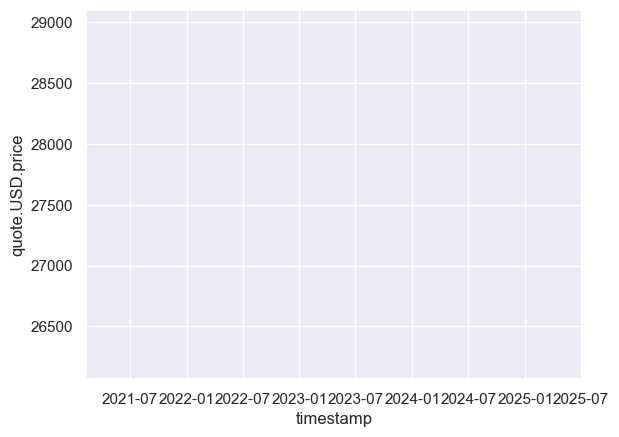

In [20]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)